# Import Library

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Dataset

In [ ]:
files.upload()

Saving customer_churn.csv to customer_churn (1).csv


{'customer_churn (1).csv': b'Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)\r\n0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.20000,4210.7\r\n1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.91,Yes,106.81667,-6.20000,3511.3\r\n2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.20000,6983.6\r\n3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.24,Yes,106.81667,-6.20000,6503.9\r\n4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.81,Yes,106.81667,-6.20000,6942\r\n5,10,Jakarta,Mid End,No,No,Yes,Yes,No,No,Credit,71.76,Yes,106.81667,-6.20000,7702.5\r\n6,1,Jakarta,Mid End,No,No,Yes,No,No,Yes,Pulsa,51.545,Yes,106.81667,-6.20000,7062.9\r\n7,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet se

In [ ]:
df = pd.read_csv('customer_churn.csv')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0


# Data Preparation

In [ ]:
# Identifying Genenar Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [ ]:
#Detecting Null Values
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [ ]:
# Detecting Duplicate Values
df.duplicated().sum()

0

In [ ]:
# Detecting Outlier

nums=['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for num in nums:
    zscore = abs(stats.zscore(df[num])) # hitung absolute z-scorenya
    df_clean = df[zscore <= 3] # keep yang kurang dari 3 absolute z-scorenya

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 7043
Jumlah baris setelah memfilter outlier: 7043


# Univariate Analysis

## Rata-rata biaya bulanan berdasarkan metode pembayarannya

### Dataframe Grouped By Payment Method

In [ ]:
group_df = df.groupby('Payment Method')['Monthly Purchase (Thou. IDR)'].mean().reset_index()
group_df = group_df.sort_values(by='Monthly Purchase (Thou. IDR)', ascending=False)
group_df = group_df.reset_index(drop=True)
group_df

,Payment Method,Monthly Purchase (Thou. IDR)
0,Pulsa,99.132558
1,Debit,87.350444
2,Credit,86.466101
3,Digital Wallet,57.092177


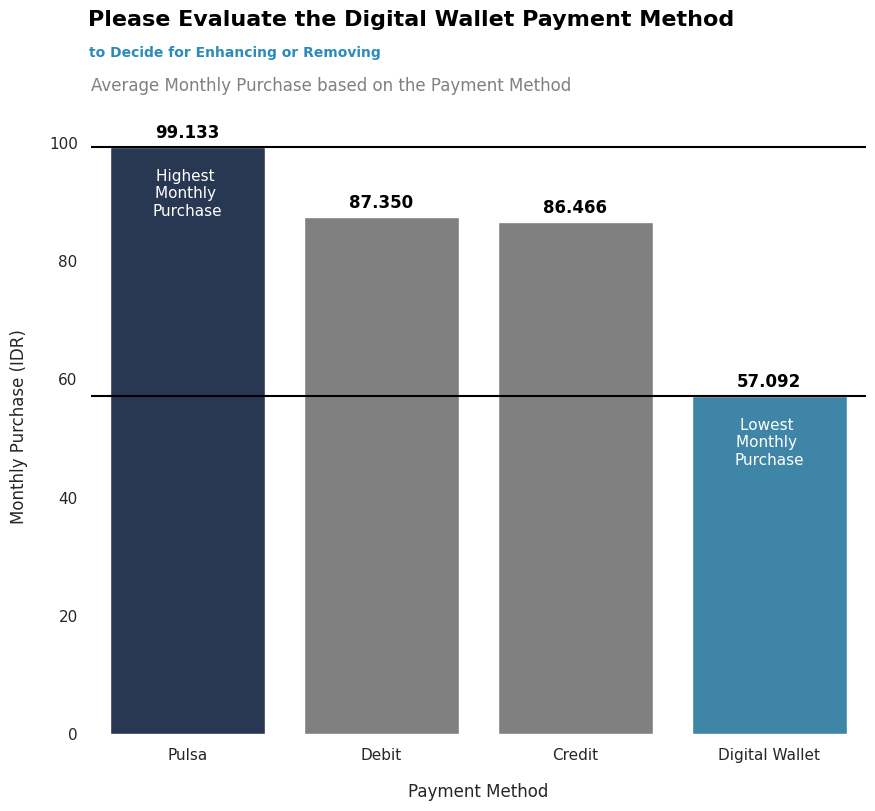

In [ ]:
# Identified Max and Min Monthly Charges
max_index = group_df['Monthly Purchase (Thou. IDR)'].idxmax()
min_index = group_df['Monthly Purchase (Thou. IDR)'].idxmin()

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(group_df))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x='Payment Method', y='Monthly Purchase (Thou. IDR)', data= group_df, palette=colors)

# Modifying Subtitle
sub_title = 'Please Evaluate the Digital Wallet Payment Method'
plt.annotate(sub_title,
             xy = (0.83, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to Decide for Enhancing or Removing '
plt.annotate(sub_title1,
             xy = (0.38, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#2D8BBA',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Average Monthly Purchase based on the Payment Method'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
# Including Label Max
plt.axhline(y = [99.132558], color = 'black', ls = 'solid', lw = 1.5)
max_value = group_df['Monthly Purchase (Thou. IDR)'][max_index]
plt.text(max_index,
         max_value - 12,
         f'Highest \nMonthly \nPurchase',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = [57.092177], color = 'black', ls = 'solid', lw = 1.5)
min_value = group_df['Monthly Purchase (Thou. IDR)'][min_index]
plt.text(min_index,
         min_value - 12,
         f'Lowest \nMonthly \nPurchase',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(group_df)):
    value = group_df['Monthly Purchase (Thou. IDR)'].iloc[i]
    plt.text(i, value + 1, f'{value:.3f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Label
plt.xlabel('Payment Method', labelpad = 15)
plt.ylabel('Monthly Purchase (IDR)', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


## Jumlah pelanggan berdasarkan kategori tenure

Masa berlangganan (tenure) dikelompokkan menjadi sebagai berikut:
*   Low: User dengan tenure < 12 bulan
*   Medium: User dengan tenure 12 - 36 bulan
*   High: User dengan tenure > 36 bulan

### Dataframe Grouped By Tenure Category

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df['Category Tenure'] = pd.cut(df['Tenure Months'],
                              bins=[0, 12, 36,
                              max(df['Tenure Months'])],
                              labels=['Low', 'Medium', 'High'],
                              include_lowest=True)
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Category Tenure
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,Low
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,Low
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,Low
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,Medium
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,High


In [ ]:
group_df = df.groupby('Category Tenure')['Customer ID'].nunique().reset_index(name = 'Total Customer')
group_df = group_df.sort_values(by='Category Tenure')

group_df

,Category Tenure,Total Customer
0,Low,2186
1,Medium,1856
2,High,3001


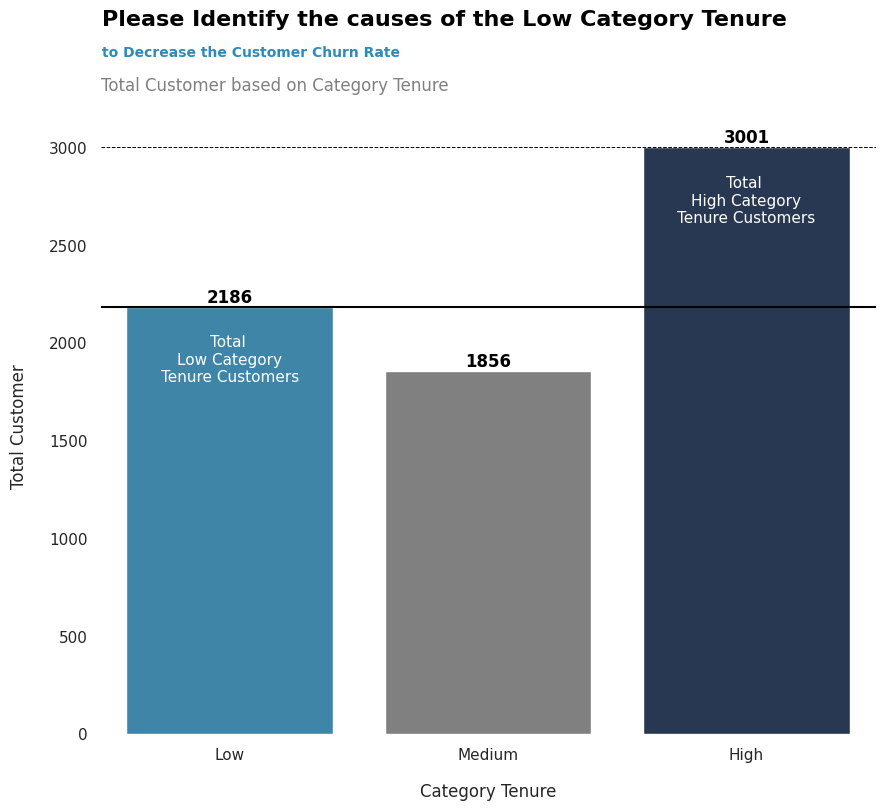

In [ ]:
# Identified High Tenure and Low Tenure
high_cat = int(group_df[group_df['Category Tenure'] == 'High']['Total Customer'].values[0])
low_cat = int(group_df[group_df['Category Tenure'] == 'Low']['Total Customer'].values[0])

# Setting Color Bar Plot
colors = ['grey' if CategoryTenure not in ['Low', 'High']
                 else ('#213559' if CategoryTenure == 'High' else '#2D8BBA')
                      for CategoryTenure in group_df['Category Tenure']]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x='Category Tenure', y='Total Customer', data = group_df, palette=colors)

# Modifying Subtitle
sub_title = 'Please Identify the causes of the Low Category Tenure'
plt.annotate(sub_title,
             xy = (0.885, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to Decrease the Customer Churn Rate'
plt.annotate(sub_title1,
             xy = (0.386, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#2D8BBA',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Total Customer based on Category Tenure'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
# Including Label Max
plt.axhline(y = [high_cat], color = 'black', ls = '--', lw = 0.7)
plt.text(2,
         high_cat - 400,
         f'Total \nHigh Category\nTenure Customers',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = [low_cat], color = 'black', ls = 'solid', lw = 1.5)
plt.text(0,
         low_cat - 400,
         f'Total \nLow Category\nTenure Customers',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(group_df)):
    value = group_df['Total Customer'].iloc[i]
    plt.text(i, value + 2, f'{value:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Label
plt.xlabel('Category Tenure', labelpad = 15)
plt.ylabel('Total Customer', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


## Ratio Jumlah pelanggan berdasarkan Churn Label

### Dataframe Grouped By Payment Method

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Churn Label')['Customer ID'].count().reset_index()
df

,Churn Label,Customer ID
0,No,5174
1,Yes,1869


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Churn Label,Customer ID,Ratio (%)
0,No,5174,73.46
1,Yes,1869,26.54


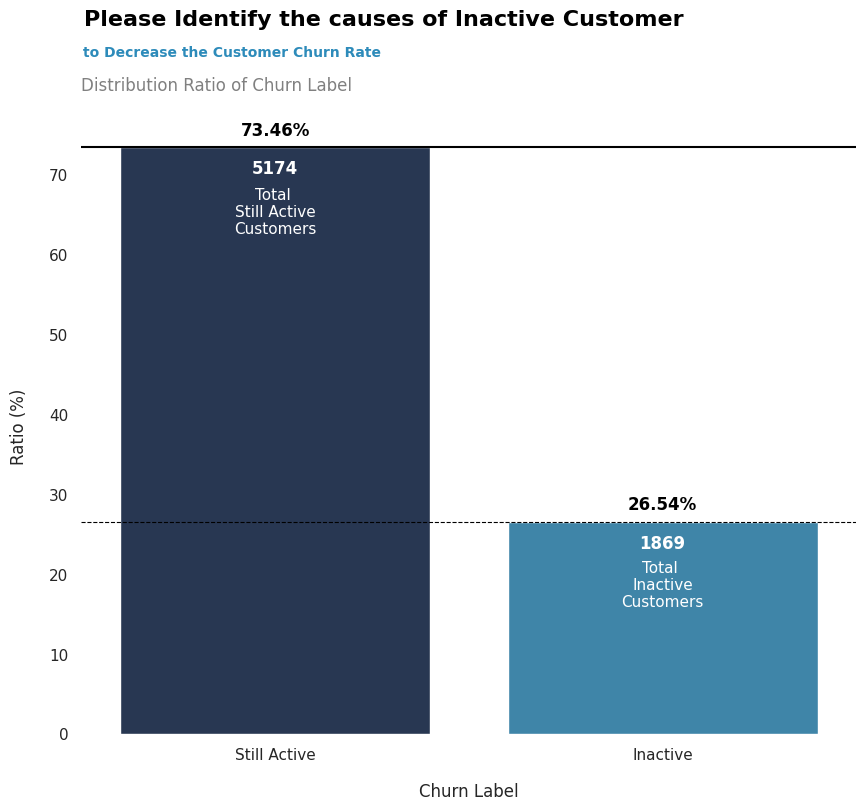

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'No': '#213559',  # Color for SeniorCitizen=0
    'Yes': '#2D8BBA',  # Color for SeniorCitizen=1
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Churn Label',
                       y = 'Ratio (%)',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Modifying Subtitle
sub_title = 'Please Identify the causes of Inactive Customer'
plt.annotate(sub_title,
             xy = (0.777, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to Decrease the Customer Churn Rate'
plt.annotate(sub_title1,
             xy = (0.386, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#2D8BBA',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Distribution Ratio of Churn Label'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
for i, label in enumerate(df['Churn Label']):
    ratio = df.loc[df['Churn Label'] == label, 'Ratio (%)'].values[0]

    # Including Label Still Active
    if label == 'No':
        plt.axhline(y=ratio, color='black', lw=1.5)
        plt.text(i, ratio - 5 , f'Total \nStill Active\nCustomers', ha='center', va='top', fontsize=11, color='white')

    # Including Label Inactive
    elif label == 'Yes':
        plt.axhline(y = ratio, color='black', ls='--', lw=0.8)
        plt.text(i, ratio - 11, f'Total \nInactive\nCustomers', ha='center', va='bottom', fontsize=11, color='white')

# Display values on top of each bar
for i in range(len(df)):
    ratio = df['Ratio (%)'].iloc[i]
    customer_id = df['Customer ID'].iloc[i]

    plt.text(i, ratio + 1, f'{ratio:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')
    plt.text(i, ratio - 3.8, f'{customer_id:.0f}', ha='center', va='bottom', fontsize=12, color='white', weight='bold')

# Customize x-tick
xtick_positions = ['No', 'Yes']
xtick_labels = ['Still Active', 'Inactive']

# Set custom x-tick positions and labels
plot_sns.set_xticks(range(len(xtick_positions)))
plot_sns.set_xticklabels(xtick_labels)

# Modifying Label
plt.xlabel('Churn Label', labelpad = 15)
plt.ylabel('Ratio (%)', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


## Ratio Jumlah Customer berdasarkan Location

### Dataframe Grouped By Location

In [ ]:
df.head()

In [ ]:
df = df.groupby('Location')['Customer ID'].count().reset_index()
df

,Location,Customer ID
0,Bandung,2012
1,Jakarta,5031


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Location,Customer ID,Ratio (%)
0,Bandung,2012,28.57
1,Jakarta,5031,71.43


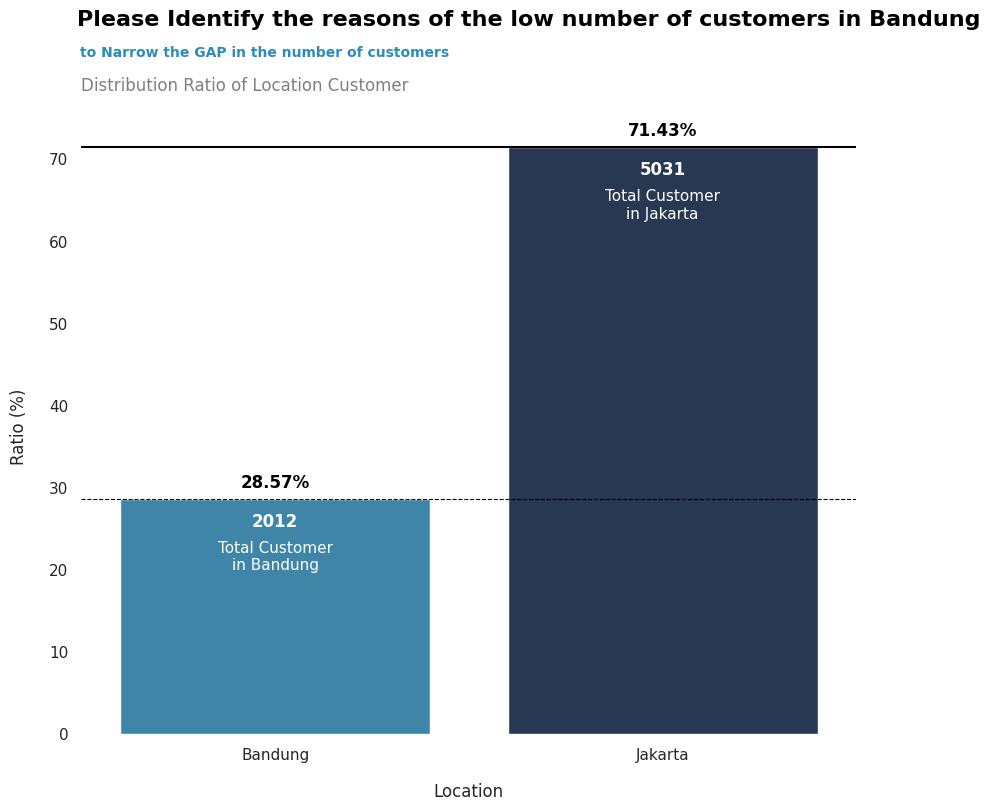

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Jakarta': '#213559',  # Color for SeniorCitizen=0
    'Bandung': '#2D8BBA',  # Color for SeniorCitizen=1
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Location',
                       y = 'Ratio (%)',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Modifying Subtitle
sub_title = 'Please Identify the reasons of the low number of customers in Bandung'
plt.annotate(sub_title,
             xy = (1.16, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to Narrow the GAP in the number of customers'
plt.annotate(sub_title1,
             xy = (0.475, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#2D8BBA',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Distribution Ratio of Location Customer'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
for i, label in enumerate(df['Location']):
    ratio = df.loc[df['Location'] == label, 'Ratio (%)'].values[0]

    # Including Label Still Active
    if label == 'Bandung':
        plt.axhline(y=ratio, color = 'black', ls='--', lw = 0.8)
        plt.text(i, ratio - 5 , f'Total Customer\nin Bandung', ha='center', va='top', fontsize=11, color='white')

    # Including Label Inactive
    elif label == 'Jakarta':
        plt.axhline(y = ratio, color = 'black', ls = 'solid', lw = 1.5)
        plt.text(i, ratio - 9, f'Total Customer\nin Jakarta', ha='center', va='bottom', fontsize=11, color='white')

# Display values on top of each bar
for i in range(len(df)):
    ratio = df['Ratio (%)'].iloc[i]
    customer_id = df['Customer ID'].iloc[i]

    plt.text(i, ratio + 1, f'{ratio:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')
    plt.text(i, ratio - 3.8, f'{customer_id:.0f}', ha='center', va='bottom', fontsize=12, color='white', weight='bold')

# Modifying Label
plt.xlabel('Location', labelpad = 15)
plt.ylabel('Ratio (%)', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


# CHURN

In [ ]:
df['Monthly Purchase (Thou. IDR)'] = df['Monthly Purchase (Thou. IDR)'].astype(str).str.replace('.', '')
df['Monthly Purchase (Thou. IDR)'] = df['Monthly Purchase (Thou. IDR)'].astype(int)
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,9191,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,13624,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,13481,Yes,106.81667,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27495,No,106.81667,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,11024,No,106.81667,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,13416,No,106.81667,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,3848,No,106.81667,-6.2,3630.9


In [ ]:
churn = df[df['Churn Label'] == 'Yes']
churn

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,9191,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,13624,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,13481,Yes,106.81667,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1864,12,Jakarta,Mid End,No,No,No,Yes,Yes,No,Pulsa,7774,Yes,106.81667,-6.2,5955.3
1865,1865,9,Jakarta,Mid End,No,No,No,No,No,No,Debit,5746,Yes,106.81667,-6.2,2637.7
1866,1866,1,Jakarta,High End,No,No,No,No,No,No,Pulsa,98475,Yes,106.81667,-6.2,7242.3
1867,1867,67,Jakarta,High End,Yes,Yes,Yes,No,Yes,No,Credit,133835,Yes,106.81667,-6.2,7306.0


## Location

In [ ]:
churn_loc = churn.groupby('Location').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_loc.columns = ['Location', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_loc['Total Churn Purchase'] = churn_loc['Total Churn Purchase'].astype(int)
churn_loc['Average Churn Purchase'] = churn_loc['Average Churn Purchase'].astype(int)

total_customers = churn_loc['Churn Customer'].sum()
churn_loc['Churn Percentage'] = round((churn_loc['Churn Customer'] / total_customers) * 100, 2)

churn_loc = churn_loc.sort_values(by='Churn Customer', ascending = False)
churn_loc

,Location,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
1,Jakarta,1323,69519658,52546,70.79
0,Bandung,546,29572946,54162,29.21


In [ ]:
df_loc = df.groupby('Location').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']  # Asumsi kolom pembelian bulanan bernama 'Monthly Purchase'
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_loc.columns = ['Location', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_loc['Total Purchase'] = df_loc['Total Purchase'].astype(int)
df_loc['Average Purchase'] = df_loc['Average Purchase'].astype(int)

total_customers = df_loc['Total Customer'].sum()
df_loc['Percentage'] = round((df_loc['Total Customer'] / total_customers) * 100, 2)

df_loc = df_loc.sort_values(by='Total Customer', ascending=False)
df_loc


,Location,Total Customer,Total Purchase,Average Purchase,Percentage
1,Jakarta,5031,232442132,46201,71.43
0,Bandung,2012,89610924,44538,28.57


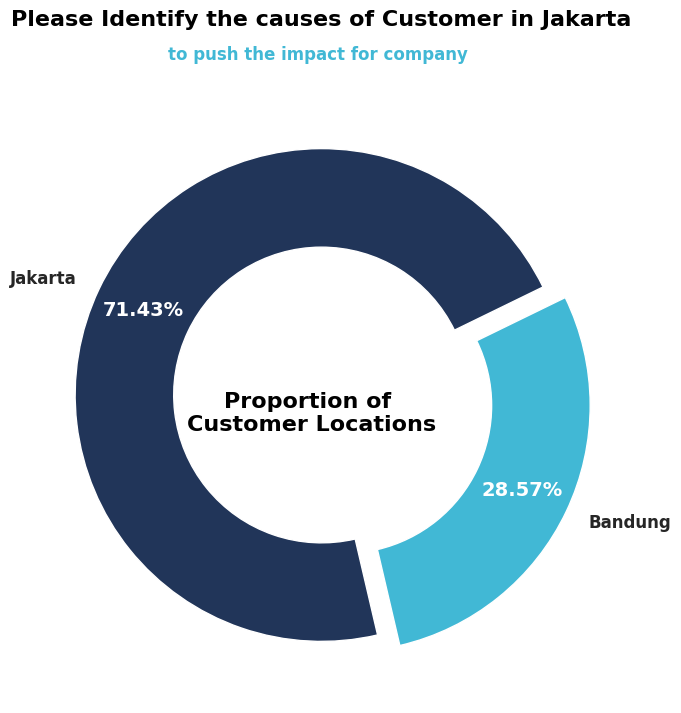

In [ ]:
# Setting Color Bar Plot
custom_colors = ['#213559', '#41B8D5']

# Creating Pie Plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(
    df_loc['Percentage'],
    labels=df_loc['Location'],
    labeldistance=1.1,
    textprops={'fontsize': 12, 'weight': 'bold'},
    autopct='%1.2f%%',
    explode=(0, 0.1),
    colors=custom_colors,
    startangle=26,
    wedgeprops=dict(width=0.4)
)

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer in Jakarta'
plt.annotate(
    sub_title,
    xy=(0.5, 1.1),
    xycoords='axes fraction',
    fontsize=16,
    color='black',
    ha='center',
    weight='bold'
)

# Modifying Title
title = 'to push the impact for company'
plt.title(
    title,
    fontsize=12,
    loc='left',
    pad=20,
    color='#41B8D5',
    weight='bold',
    x=0.25
)

title = 'Proportion of \nCustomer Locations'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.5)

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')

# Showing plot
plt.show()

In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_loc, churn_loc, on='Location', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Location', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Location,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases,Difference Average in Purchases
0,Jakarta,5031,71.43,1323,70.79,232442132,69519658,46201,52546,26.30,162922474,-6345
1,Bandung,2012,28.57,546,29.21,89610924,29572946,44538,54162,27.14,60037978,-9624


## Payment Method

In [ ]:
churn_pay = churn.groupby('Payment Method').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']  # Asumsi kolom pembelian bulanan bernama 'Monthly Purchase'
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_pay.columns = ['Payment Method', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_pay['Total Churn Purchase'] = churn_pay['Total Churn Purchase'].astype(int)
churn_pay['Average Churn Purchase'] = churn_pay['Average Churn Purchase'].astype(int)

total_customers = churn_pay['Churn Customer'].sum()
churn_pay['Churn Percentage'] = round((churn_pay['Churn Customer'] / total_customers) * 100, 2)

churn_pay = churn_pay.sort_values(by='Churn Customer', ascending = False)
churn_pay

,Payment Method,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
3,Pulsa,1071,60125676,56139,57.30
2,Digital Wallet,308,11725233,38068,16.48
1,Debit,258,15062853,58383,13.80
0,Credit,232,12178842,52495,12.41


In [ ]:
df_pay = df.groupby('Payment Method').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']  # Asumsi kolom pembelian bulanan bernama 'Monthly Purchase'
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_pay.columns = ['Payment Method', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_pay['Total Purchase'] = df_pay['Total Purchase'].astype(int)
df_pay['Average Purchase'] = df_pay['Average Purchase'].astype(int)

total_customers = df_pay['Total Customer'].sum()
df_pay['Percentage'] = round((df_pay['Total Customer'] / total_customers) * 100, 2)

df_pay = df_pay.sort_values(by='Total Customer', ascending = False)
df_pay

,Payment Method,Total Customer,Total Purchase,Average Purchase,Percentage
3,Pulsa,2365,129338625,54688,33.58
2,Digital Wallet,1612,49978227,31003,22.89
1,Debit,1544,73583432,47657,21.92
0,Credit,1522,69152772,45435,21.61


In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_pay, churn_pay, on='Payment Method', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Payment Method', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Payment Method,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases
0,Pulsa,2365,33.58,1071,57.30,129338625,60125676,54688,56139,45.29,-1451
1,Digital Wallet,1612,22.89,308,16.48,49978227,11725233,31003,38068,19.11,-7065
2,Debit,1544,21.92,258,13.80,73583432,15062853,47657,58383,16.71,-10726
3,Credit,1522,21.61,232,12.41,69152772,12178842,45435,52495,15.24,-7060


## Games Product

In [ ]:
churn_game = churn.groupby('Games Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_game.columns = ['Games Product', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_game['Total Churn Purchase'] = churn_game['Total Churn Purchase'].astype(int)
churn_game['Average Churn Purchase'] = churn_game['Average Churn Purchase'].astype(int)

total_customers = churn_game['Churn Customer'].sum()
churn_game['Churn Percentage'] = round((churn_game['Churn Customer'] / total_customers) * 100, 2)

churn_game = churn_game.sort_values(by='Churn Customer', ascending = False)
churn_game

,Games Product,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
0,No,1461,80862379,55347,78.17
2,Yes,295,16568903,56165,15.78
1,No internet service,113,1661322,14701,6.05


In [ ]:
df_game = df.groupby('Games Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_game.columns = ['Games Product', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_game['Total Purchase'] = df_game['Total Purchase'].astype(int)
df_game['Average Purchase'] = df_game['Average Purchase'].astype(int)

total_customers = df_game['Total Customer'].sum()
df_game['Percentage'] = round((df_game['Total Customer'] / total_customers) * 100, 2)

df_game = df_game.sort_values(by='Total Customer', ascending = False)
df_game

,Games Product,Total Customer,Total Purchase,Average Purchase,Percentage
0,No,3498,187788653,53684,49.67
2,Yes,2019,110960993,54958,28.67
1,No internet service,1526,23303410,15270,21.67


In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_game, churn_game, on='Games Product', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Games Product', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Games Product,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases,Difference Average in Purchases
0,No,3498,49.67,1461,78.17,187788653,80862379,53684,55347,41.77,106926274,-1663
1,Yes,2019,28.67,295,15.78,110960993,16568903,54958,56165,14.61,94392090,-1207
2,No internet service,1526,21.67,113,6.05,23303410,1661322,15270,14701,7.40,21642088,569


## Music Product

In [ ]:
churn_music = churn.groupby('Music Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_music.columns = ['Music Product', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_music['Total Churn Purchase'] = churn_music['Total Churn Purchase'].astype(int)
churn_music['Average Churn Purchase'] = churn_music['Average Churn Purchase'].astype(int)

total_customers = churn_music['Churn Customer'].sum()
churn_music['Churn Percentage'] = round((churn_music['Churn Customer'] / total_customers) * 100, 2)

churn_music = churn_music.sort_values(by='Churn Customer', ascending = False)
churn_music

,Music Product,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
0,No,1233,65764127,53336,65.97
2,Yes,523,31667155,60549,27.98
1,No internet service,113,1661322,14701,6.05


In [ ]:
df_music = df.groupby('Music Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_music.columns = ['Music Product', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_music['Total Purchase'] = df_music['Total Purchase'].astype(int)
df_music['Average Purchase'] = df_music['Average Purchase'].astype(int)

total_customers = df_music['Total Customer'].sum()
df_music['Percentage'] = round((df_music['Total Customer'] / total_customers) * 100, 2)

df_music = df_music.sort_values(by='Total Customer', ascending = False)
df_music

,Music Product,Total Customer,Total Purchase,Average Purchase,Percentage
0,No,3088,157718665,51074,43.84
2,Yes,2429,141030981,58061,34.49
1,No internet service,1526,23303410,15270,21.67


In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_music, churn_music, on='Music Product', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Music Product', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Music Product,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases,Difference Average in Purchases
0,No,3088,43.84,1233,65.97,157718665,65764127,51074,53336,39.93,91954538,-2262
1,Yes,2429,34.49,523,27.98,141030981,31667155,58061,60549,21.53,109363826,-2488
2,No internet service,1526,21.67,113,6.05,23303410,1661322,15270,14701,7.40,21642088,569


## Education Product

In [ ]:
churn_edu = churn.groupby('Education Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_edu.columns = ['Education Product', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_edu['Total Churn Purchase'] = churn_edu['Total Churn Purchase'].astype(int)
churn_edu['Average Churn Purchase'] = churn_edu['Average Churn Purchase'].astype(int)

total_customers = churn_edu['Churn Customer'].sum()
churn_edu['Churn Percentage'] = round((churn_edu['Churn Customer'] / total_customers) * 100, 2)

churn_edu = churn_edu.sort_values(by='Churn Customer', ascending = False)
churn_edu

,Education Product,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
0,No,1211,63405706,52358,64.79
2,Yes,545,34025576,62432,29.16
1,No internet service,113,1661322,14701,6.05


In [ ]:
df_edu = df.groupby('Education Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_edu.columns = ['Education Product', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_edu['Total Purchase'] = df_edu['Total Purchase'].astype(int)
df_edu['Average Purchase'] = df_edu['Average Purchase'].astype(int)

total_customers = df_edu['Total Customer'].sum()
df_edu['Percentage'] = round((df_edu['Total Customer'] / total_customers) * 100, 2)

df_edu = df_edu.sort_values(by='Total Customer', ascending = False)
df_edu

,Education Product,Total Customer,Total Purchase,Average Purchase,Percentage
0,No,3095,154126518,49798,43.94
2,Yes,2422,144623128,59712,34.39
1,No internet service,1526,23303410,15270,21.67


In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_edu, churn_edu, on='Education Product', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Education Product', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Education Product,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases,Difference Average in Purchases
0,No,3095,43.94,1211,64.79,154126518,63405706,49798,52358,39.13,90720812,-2560
1,Yes,2422,34.39,545,29.16,144623128,34025576,59712,62432,22.50,110597552,-2720
2,No internet service,1526,21.67,113,6.05,23303410,1661322,15270,14701,7.40,21642088,569


## Video Product

In [ ]:
churn_vid = churn.groupby('Video Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
churn_vid.columns = ['Video Product', 'Churn Customer', 'Total Churn Purchase', 'Average Churn Purchase']
churn_vid['Total Churn Purchase'] = churn_vid['Total Churn Purchase'].astype(int)
churn_vid['Average Churn Purchase'] = churn_vid['Average Churn Purchase'].astype(int)

total_customers = churn_vid['Churn Customer'].sum()
churn_vid['Churn Percentage'] = round((churn_vid['Churn Customer'] / total_customers) * 100, 2)

churn_vid = churn_vid.sort_values(by='Churn Customer', ascending = False)
churn_vid

,Video Product,Churn Customer,Total Churn Purchase,Average Churn Purchase,Churn Percentage
0,No,942,44114226,46830,50.40
2,Yes,814,53317056,65500,43.55
1,No internet service,113,1661322,14701,6.05


In [ ]:
df_vid = df.groupby('Video Product').agg({
    'Customer ID': 'nunique',
    'Monthly Purchase (Thou. IDR)': ['sum', 'mean']
}).reset_index()

# Menamai ulang kolom hasil agregasi
df_vid.columns = ['Video Product', 'Total Customer', 'Total Purchase', 'Average Purchase']
df_vid['Total Purchase'] = df_vid['Total Purchase'].astype(int)
df_vid['Average Purchase'] = df_vid['Average Purchase'].astype(int)

total_customers = df_vid['Total Customer'].sum()
df_vid['Percentage'] = round((df_vid['Total Customer'] / total_customers) * 100, 2)

df_vid = df_vid.sort_values(by='Total Customer', ascending = False)
df_vid

,Video Product,Total Customer,Total Purchase,Average Purchase,Percentage
0,No,2810,129897248,46226,39.90
2,Yes,2707,168852398,62376,38.44
1,No internet service,1526,23303410,15270,21.67


In [ ]:
# Menggabungkan kedua DataFrame
comparison_df = pd.merge(df_vid, churn_vid, on='Video Product', how='outer').fillna(0)

# Menyusun ulang kolom
comparison_df = comparison_df[['Video Product', 'Total Customer', 'Percentage', 'Churn Customer', 'Churn Percentage', 'Total Purchase', 'Total Churn Purchase', 'Average Purchase', 'Average Churn Purchase']]

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    'Total Customer_df': 'Total Customer',
    'Percentage_df': 'Percentage',
    'Total Customer_churn': 'Churn Customer',
    'Percentage_churn': 'Churn Percentage'
})

comparison_df['Ratio Churn'] = round((comparison_df['Churn Customer'] / comparison_df['Total Customer']) * 100, 2)
comparison_df['Difference in Purchases'] = (comparison_df['Total Purchase'] - comparison_df['Total Churn Purchase'])
comparison_df['Difference Average in Purchases'] = (comparison_df['Average Purchase'] - comparison_df['Average Churn Purchase'])

comparison_df

,Video Product,Total Customer,Percentage,Churn Customer,Churn Percentage,Total Purchase,Total Churn Purchase,Average Purchase,Average Churn Purchase,Ratio Churn,Difference in Purchases,Difference Average in Purchases
0,No,2810,39.90,942,50.40,129897248,44114226,46226,46830,33.52,85783022,-604
1,Yes,2707,38.44,814,43.55,168852398,53317056,62376,65500,30.07,115535342,-3124
2,No internet service,1526,21.67,113,6.05,23303410,1661322,15270,14701,7.40,21642088,569


# Ratio Jumlah Customer berdasarkan Device Class

### Dataframe Grouped By Location

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Device Class')['Customer ID'].count().reset_index()
df

,Device Class,Customer ID
0,High End,3096
1,Low End,1526
2,Mid End,2421


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Device Class,Customer ID,Ratio (%)
0,High End,3096,43.96
1,Low End,1526,21.67
2,Mid End,2421,34.37


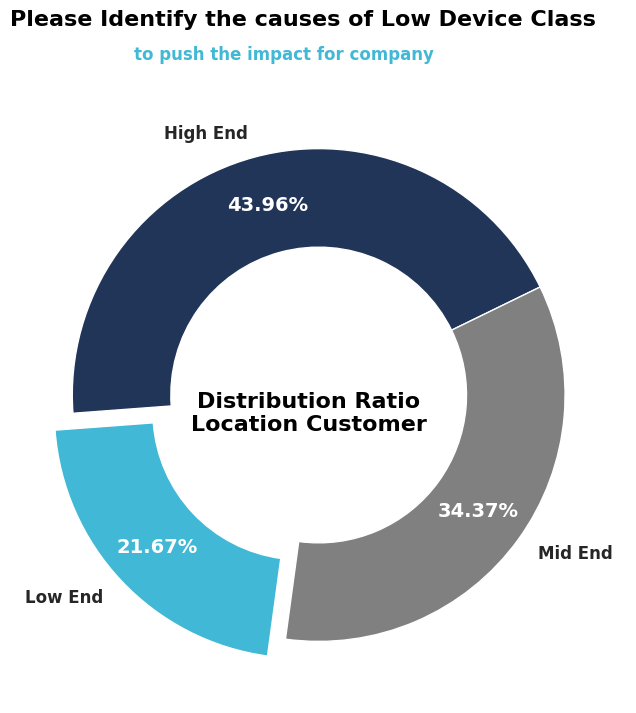

In [ ]:
 # Setting Color Bar Plot
custom_color = {
    'High End': '#213559',
    'Mid End': 'grey',
    'Low End': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = df['Device Class'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0, 0.1, 0),
                                            colors=[custom_color[class_] for class_ in df['Device Class']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Low Device Class'
plt.annotate(sub_title,
             xy = (0.95, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'to push the impact for company'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold',
          x = 0.2)

title = 'Distribution Ratio\nLocation Customer'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.5)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Call Center

### Dataframe Grouped By Call Center

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Call Center')['Customer ID'].count().reset_index()
df

,Call Center,Customer ID
0,No,4999
1,Yes,2044


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Call Center,Customer ID,Ratio (%)
0,No,4999,70.98
1,Yes,2044,29.02


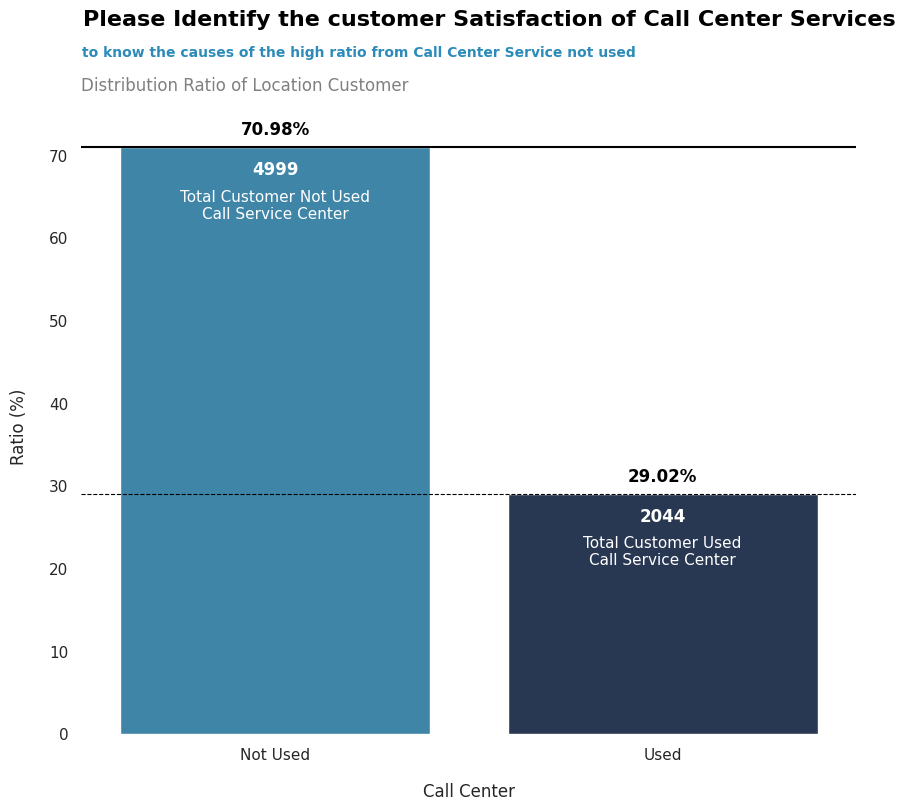

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',  # Color for SeniorCitizen=0
    'No': '#2D8BBA',  # Color for SeniorCitizen=1
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Call Center',
                       y = 'Ratio (%)',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Modifying Subtitle
sub_title = 'Please Identify the customer Satisfaction of Call Center Services'
plt.annotate(sub_title,
             xy = (1.05, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to know the causes of the high ratio from Call Center Service not used'
plt.annotate(sub_title1,
             xy = (0.715, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#2D8BBA',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Distribution Ratio of Location Customer'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
for i, label in enumerate(df['Call Center']):
    ratio = df.loc[df['Call Center'] == label, 'Ratio (%)'].values[0]

    # Including Label Not used
    if label == 'Yes':
        plt.axhline(y=ratio, color = 'black', ls='--', lw = 0.8)
        plt.text(i, ratio - 5 , f'Total Customer Used\nCall Service Center', ha='center', va='top', fontsize=11, color='white')

    # Including Label used
    elif label == 'No':
        plt.axhline(y = ratio, color = 'black', ls = 'solid', lw = 1.5)
        plt.text(i, ratio - 9, f'Total Customer Not Used\nCall Service Center', ha='center', va='bottom', fontsize=11, color='white')

# Display values on top of each bar
for i in range(len(df)):
    ratio = df['Ratio (%)'].iloc[i]
    customer_id = df['Customer ID'].iloc[i]

    plt.text(i, ratio + 1, f'{ratio:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')
    plt.text(i, ratio - 3.8, f'{customer_id:.0f}', ha='center', va='bottom', fontsize=12, color='white', weight='bold')

# Customize x-tick
xtick_positions = ['No', 'Yes']
xtick_labels = ['Not Used', 'Used']

# Set custom x-tick positions and labels
plot_sns.set_xticks(range(len(xtick_positions)))
plot_sns.set_xticklabels(xtick_labels)

# Modifying Label
plt.xlabel('Call Center', labelpad = 15)
plt.ylabel('Ratio (%)', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Use My App

### Dataframe Grouped By Use MyApp

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Use MyApp')['Customer ID'].count().reset_index()
df

,Use MyApp,Customer ID
0,No,2785
1,No internet service,1526
2,Yes,2732


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Use MyApp,Customer ID,Ratio (%)
0,No,2785,39.54
1,No internet service,1526,21.67
2,Yes,2732,38.79


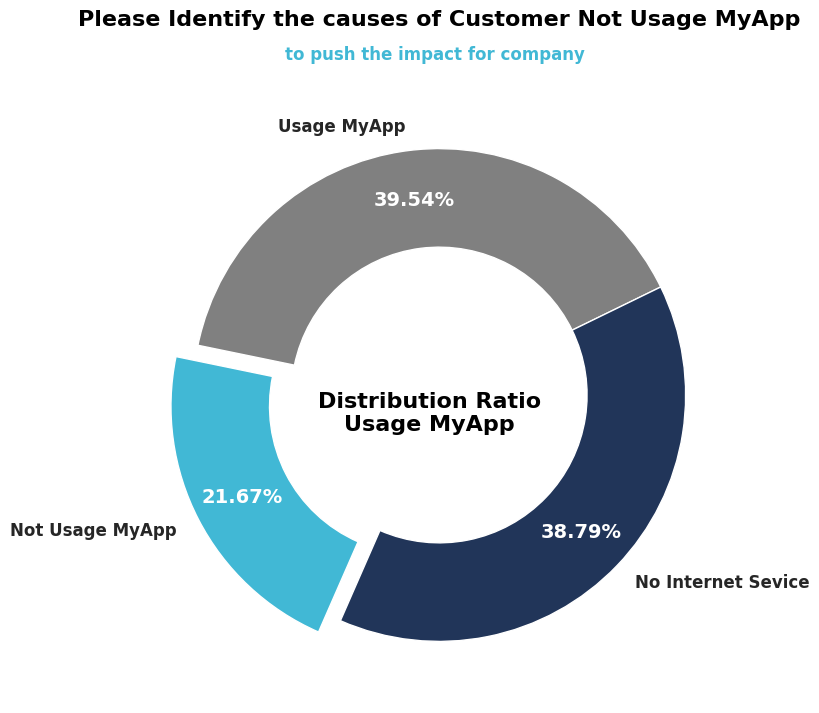

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',
    'No': 'grey',
    'No internet service': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = ['Usage MyApp', 'Not Usage MyApp', 'No Internet Sevice'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0, 0.1, 0),
                                            colors = [custom_color[class_] for class_ in df['Use MyApp']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer Not Usage MyApp'
plt.annotate(sub_title,
             xy = (0.5, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'center',
             weight = 'bold')

# Modifying Title
title = 'to push the impact for company'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold',
          x = 0.25)

title = 'Distribution Ratio\nUsage MyApp'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.5)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Games Product

### Dataframe Grouped By Games Product

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Games Product')['Customer ID'].count().reset_index()
df

,Games Product,Customer ID
0,No,3498
1,No internet service,1526
2,Yes,2019


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Games Product,Customer ID,Ratio (%)
0,No,3498,49.67
1,No internet service,1526,21.67
2,Yes,2019,28.67


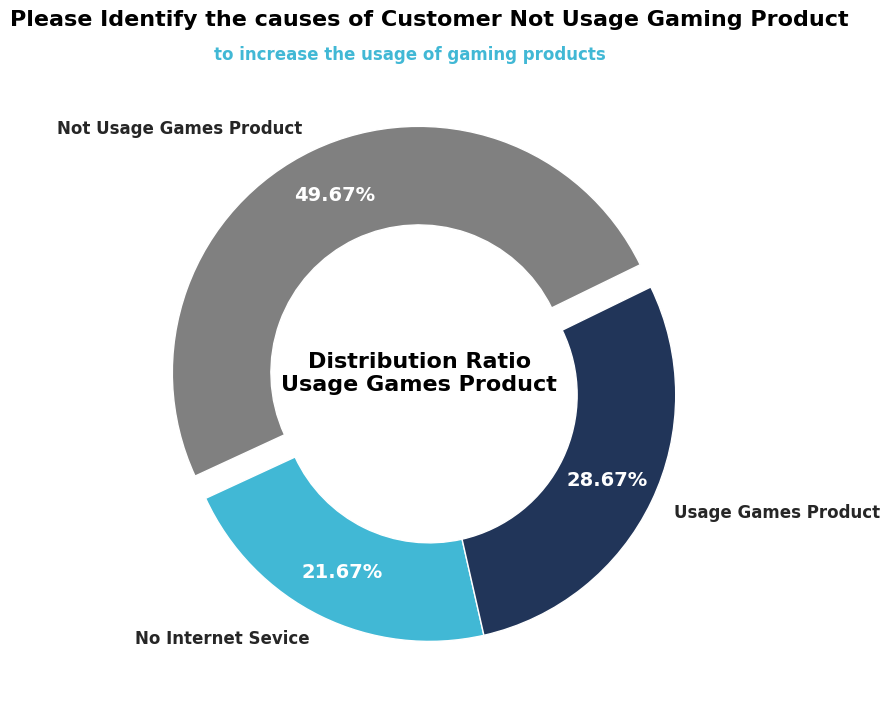

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',
    'No': 'grey',
    'No internet service': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = ['Not Usage Games Product', 'No Internet Sevice', 'Usage Games Product'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0.1, 0, 0),
                                            colors = [custom_color[class_] for class_ in df['Games Product']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer Not Usage Gaming Product'
plt.annotate(sub_title,
             xy = (0.5, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'center',
             weight = 'bold')

# Modifying Title
title = 'to increase the usage of gaming products'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold',
          x = 0.15)

title = 'Distribution Ratio\nUsage Games Product'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.55)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Music Product

### Dataframe Grouped By Music Product

In [ ]:
df = pd.read_excel('Copy of Telco_customer_churn_adapted_v2(1).xlsx')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Music Product')['Customer ID'].count().reset_index()
df

,Music Product,Customer ID
0,No,3088
1,No internet service,1526
2,Yes,2429


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Music Product,Customer ID,Ratio (%)
0,No,3088,43.84
1,No internet service,1526,21.67
2,Yes,2429,34.49


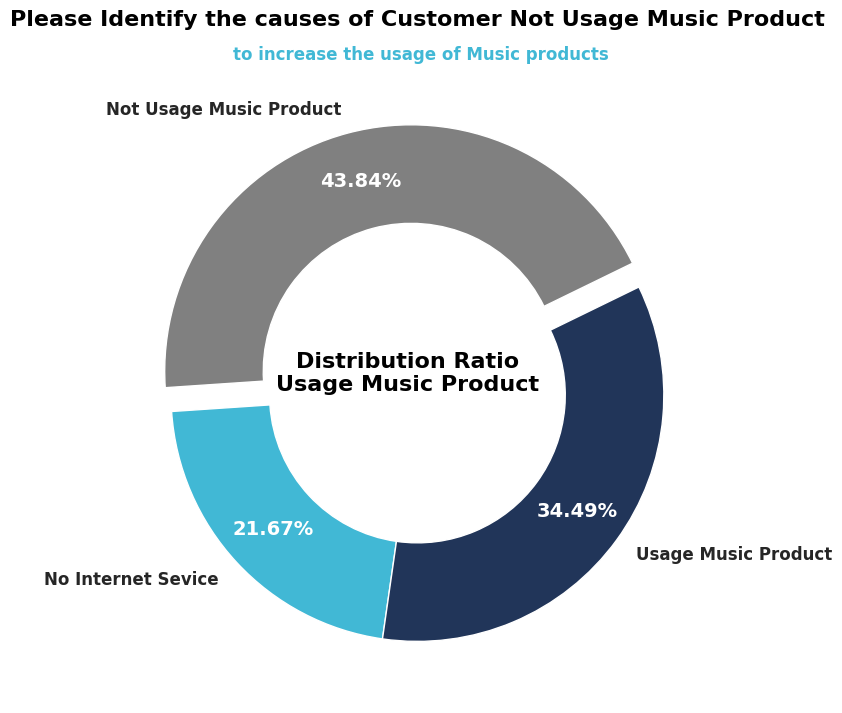

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',
    'No': 'grey',
    'No internet service': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = ['Not Usage Music Product', 'No Internet Sevice', 'Usage Music Product'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0.1, 0, 0),
                                            colors = [custom_color[class_] for class_ in df['Music Product']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer Not Usage Music Product'
plt.annotate(sub_title,
             xy = (0.5, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'center',
             weight = 'bold')

# Modifying Title
title = 'to increase the usage of Music products'
plt.title(title,
          fontsize = 12,
          x = 0.2,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold')

title = 'Distribution Ratio\nUsage Music Product'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.55)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Education Product

### Dataframe Grouped By Location

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Education Product')['Customer ID'].count().reset_index()
df

,Education Product,Customer ID
0,No,3095
1,No internet service,1526
2,Yes,2422


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Education Product,Customer ID,Ratio (%)
0,No,3095,43.94
1,No internet service,1526,21.67
2,Yes,2422,34.39


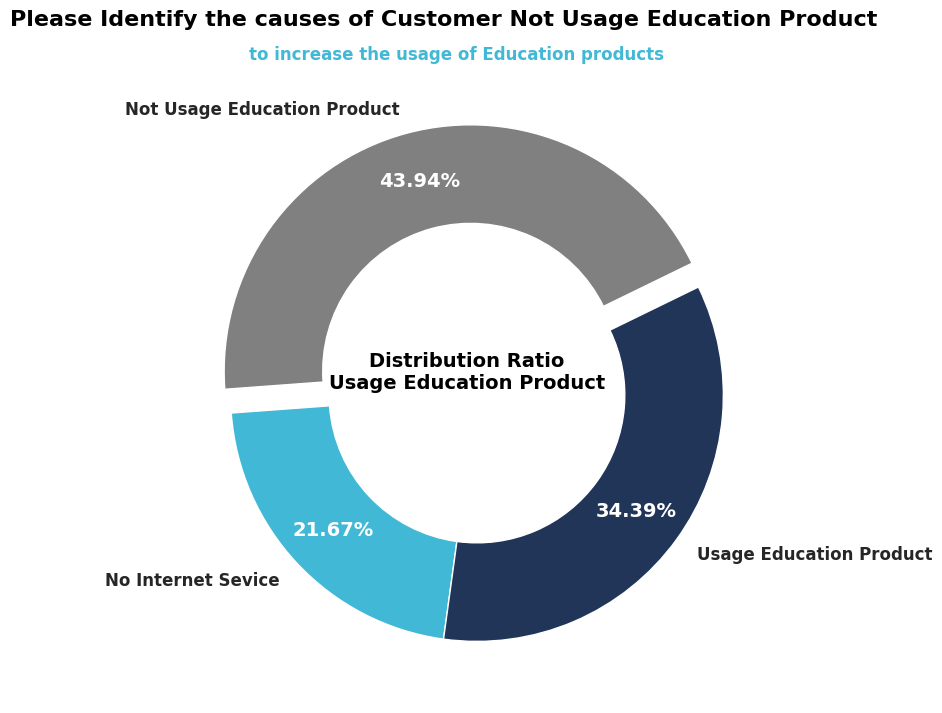

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',
    'No': 'grey',
    'No internet service': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = ['Not Usage Education Product', 'No Internet Sevice', 'Usage Education Product'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0.1, 0, 0),
                                            colors = [custom_color[class_] for class_ in df['Education Product']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer Not Usage Education Product'
plt.annotate(sub_title,
             xy = (1.15, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'to increase the usage of Education products'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold',
          x = 0.13)

title = 'Distribution Ratio\nUsage Education Product'
plt.suptitle(title, fontsize = 14, color='black', weight='bold', y=0.55)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Ratio Jumlah Customer berdasarkan Video Product

### Dataframe Grouped By Video Product

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df = df.groupby('Video Product')['Customer ID'].count().reset_index()
df

,Video Product,Customer ID
0,No,2810
1,No internet service,1526
2,Yes,2707


In [ ]:
# Calculate the total count
total_count = df['Customer ID'].sum()

# Add a new column for the ratio in percentage directly to the existing DataFrame
df['Ratio (%)'] = (df['Customer ID'] / total_count) * 100

round(df, 2)


,Video Product,Customer ID,Ratio (%)
0,No,2810,39.90
1,No internet service,1526,21.67
2,Yes,2707,38.44


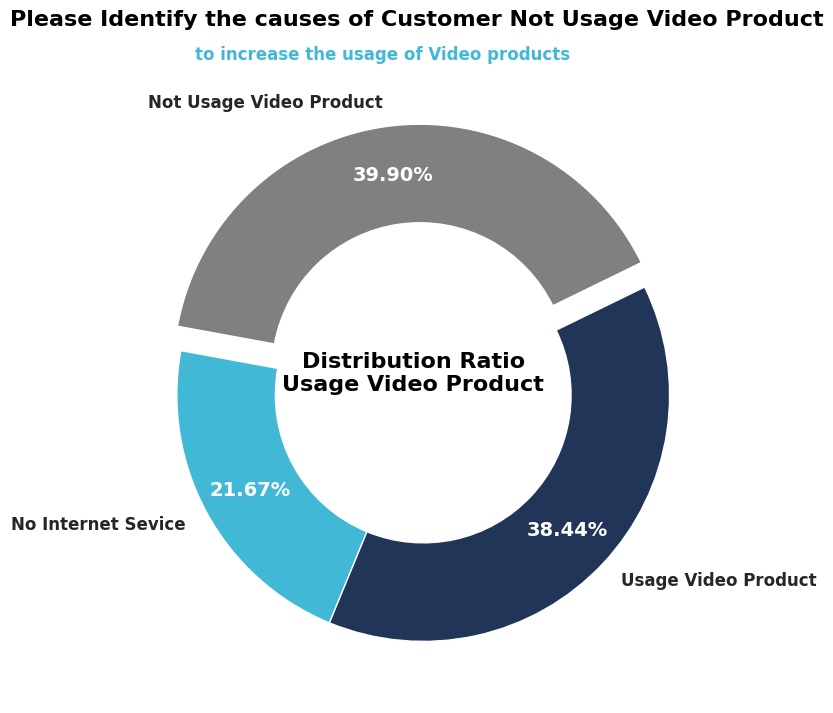

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Yes': '#213559',
    'No': 'grey',
    'No internet service': '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 8))
pie_wedge_collection, _, autotexts = plt.pie(df['Ratio (%)'],
                                            labels = ['Not Usage Video Product', 'No Internet Sevice', 'Usage Video Product'],
                                            labeldistance = 1.1,
                                            textprops = {'fontsize' : 12, 'weight' : 'bold'},
                                            autopct = '%1.2f%%',
                                            explode = (0.1, 0, 0),
                                            colors = [custom_color[class_] for class_ in df['Video Product']],
                                            startangle = 26,
                                            wedgeprops = dict(width=0.4))

# Modifying Subtitle
sub_title = 'Please Identify the causes of Customer Not Usage Video Product'
plt.annotate(sub_title,
             xy = (1.15, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'to increase the usage of Video products'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = '#41B8D5',
          weight = 'bold',
          x = 0.13)

title = 'Distribution Ratio\nUsage Video Product'
plt.suptitle(title, fontsize=16, color='black', weight='bold', y=0.55)  # Adjust 'y' as needed

# Adding percentage labels at the center of each pie slice
for autotext, wedge in zip(autotexts, pie_wedge_collection):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x, y = wedge.center
    x += 0.8 * (wedge.r) * np.cos(angle * np.pi / 180)
    y += 0.8 * (wedge.r) * np.sin(angle * np.pi / 180)
    autotext.set_position((x, y))
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# Modifying Grid
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')


# Showing plot
plt.show()


# Bagaimana distribusi dari Monthly Purchase?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

### Distribusion of Total Purchase

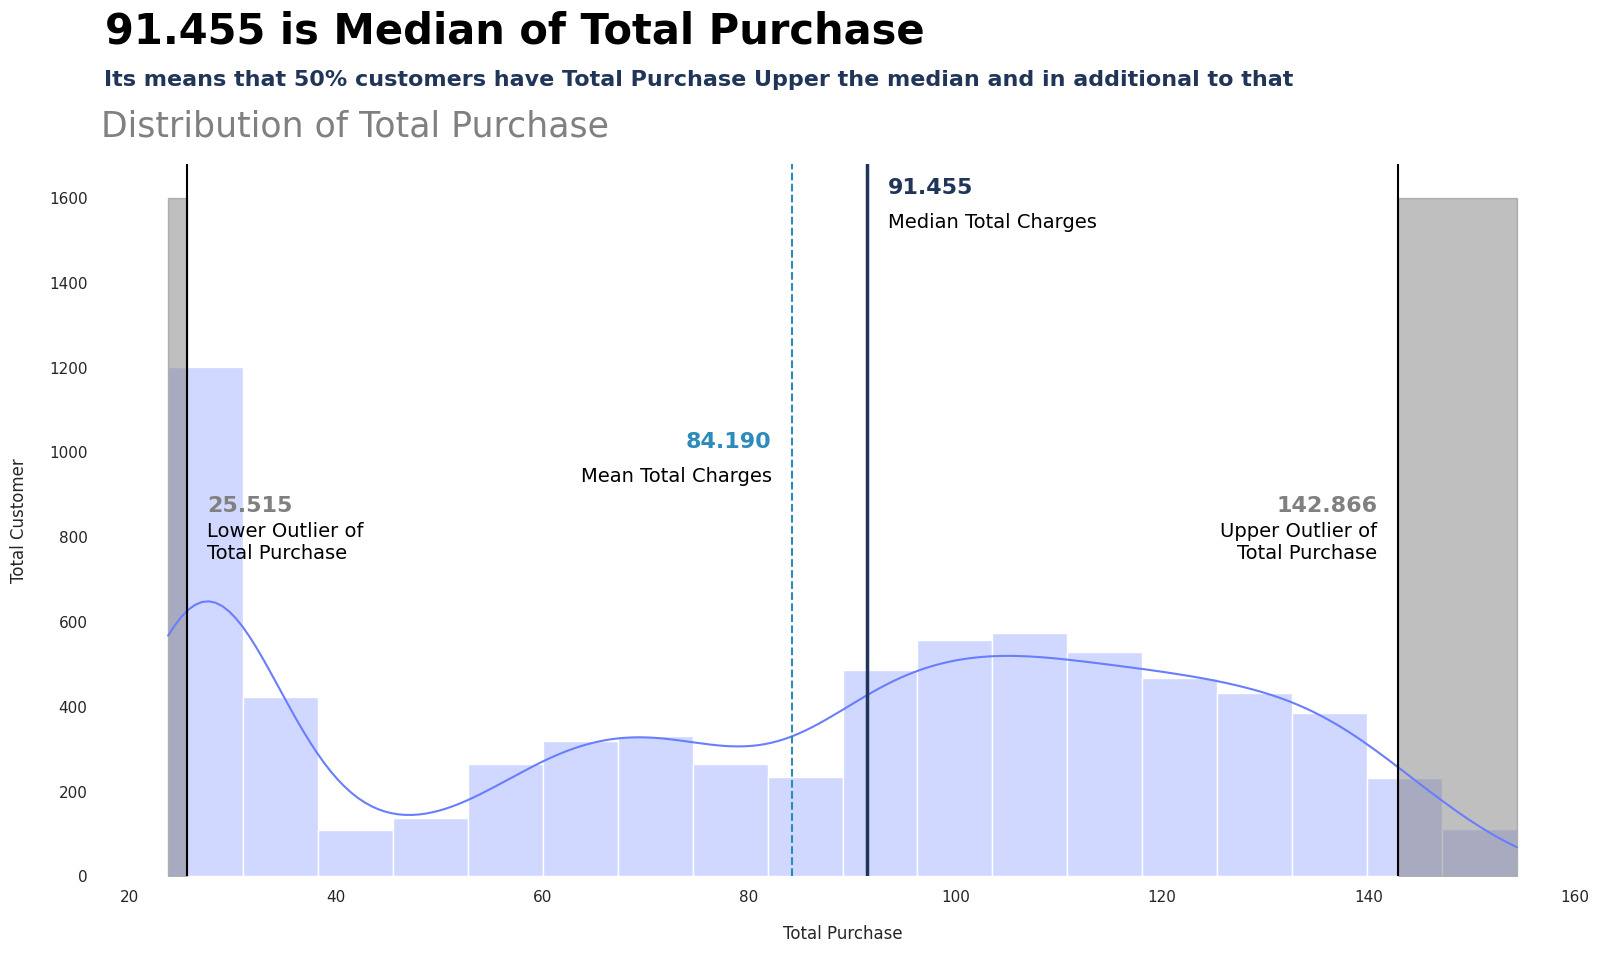

In [ ]:
# Insight of Distribution
mean = df['Monthly Purchase (Thou. IDR)'].mean()
median = df['Monthly Purchase (Thou. IDR)'].median()
std = df['Monthly Purchase (Thou. IDR)'].std()

# Identify Outlier
# Upper Outlier
factor = 1.5
upper_out = mean + (std * factor)
outliers = df[df['Monthly Purchase (Thou. IDR)'] > upper_out]

# Lower Outlier
factor = 1.5
lower_out = mean - (std * factor)
outliers1 = df[df['Monthly Purchase (Thou. IDR)'] < lower_out]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plot_sns = sns.displot(data = df,
                       x = 'Monthly Purchase (Thou. IDR)',
                       kind = 'hist',
                       kde = True,
                       height = 8,
                       aspect = 2,
                       color = '#687EFF',
                       alpha = 0.3)

# Modifying Subtitle
sub_title = '91.455 is Median of Total Purchase'
plt.annotate(sub_title,
             xy = (0.555, 1.17),
             xycoords = 'axes fraction',
             fontsize = 30,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'Its means that 50% customers have Total Purchase Upper the median and in additional to that'
plt.annotate(sub_title1,
             xy = (0.002, 1.11),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'left',
             weight = 'bold')

# Modifying Title
title = 'Distribution of Total Purchase'
plt.title(title,
          fontsize = 25,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Mean, Median, Outlier Line
# MEAN
plt.axvline(x = mean, color = '#2D8BBA', ls = '--', lw = 1.5)
plt.text(mean - 2,
         1000,
         f'{mean:.3f}',
         ha = 'right',
         va = 'bottom',
         fontsize = 16,
         color = '#2D8BBA',
         weight = 'bold')
plt.text(mean - 2,
         920,
         f'Mean Total Charges',
         ha = 'right',
         va = 'bottom',
         fontsize = 14,
         color = 'black')

# MEDIAN
plt.axvline(x = median, color = '#213559', ls = 'solid', lw = 2.5)
plt.text(median + 2,
         1600,
         f'{median:.3f}',
         ha = 'left',
         va = 'bottom',
         fontsize = 16,
         color = '#213559',
         weight = 'bold')
plt.text(median + 2,
         1520,
         f'Median Total Charges',
         ha = 'left',
         va = 'bottom',
         fontsize = 14,
         color = 'black')

# OUTLIER
# Upper Outlier
plt.axvline(x = upper_out, color = 'black', ls = 'solid', lw = 1.5)
plt.fill_betweenx([0, 1600], upper_out, df['Monthly Purchase (Thou. IDR)'].max(), color='grey', alpha=0.5)
plt.text(upper_out - 2,
         850,
         f'{upper_out:.3f}',
         ha = 'right',
         va = 'bottom',
         fontsize = 16,
         color = 'grey',
         weight = 'bold')
plt.text(upper_out - 2,
         740,
         f'Upper Outlier of\nTotal Purchase',
         ha = 'right',
         va = 'bottom',
         fontsize = 14,
         color = 'black')

# Lower Outlier
plt.axvline(x = lower_out, color = 'black', ls = 'solid', lw = 1.5)
plt.fill_betweenx([0, 1600], lower_out, df['Monthly Purchase (Thou. IDR)'].min(), color='grey', alpha=0.5)
plt.text(lower_out + 2,
         850,
         f'{lower_out:.3f}',
         ha = 'left',
         va = 'bottom',
         fontsize = 16,
         color = 'grey',
         weight = 'bold')
plt.text(lower_out + 2,
         740,
         f'Lower Outlier of\nTotal Purchase',
         ha = 'left',
         va = 'bottom',
         fontsize = 14,
         color = 'black')

# Modifying Label
plt.xlabel('Total Purchase', labelpad = 15)
plt.ylabel('Total Customer', labelpad = 15)

# Modifying Grid
plt.grid(False)
for ax in plot_sns.axes.flat:
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

# Showing plot
plt.show()


# Apakah pelanggan yang memiliki biaya bulanan lebih tinggi akan cenderung untuk berhenti berlangganan (churn)?

In [ ]:
df = pd.read_excel('Copy of Telco_customer_churn_adapted_v2(1).xlsx')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Combination
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,No_Mid End
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,No_High End
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,Yes_High End
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,Yes_High End
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,Yes_High End


### Distribusion of Total Purchase

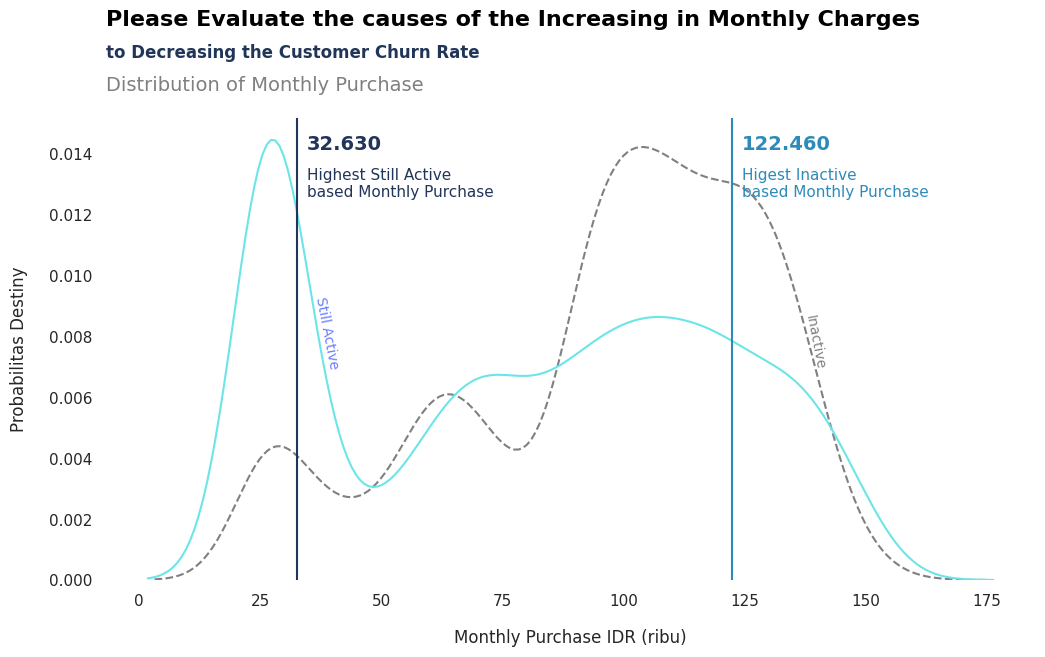

In [ ]:
# Creating Bar Plot
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df[df['Churn Label'] == 'Yes']['Monthly Purchase (Thou. IDR)'].dropna(),
            fill = False,
            color = 'grey',
            alpha = 1,
            linestyle = '--',
            ax=ax)
sns.kdeplot(df[df['Churn Label'] == 'No']['Monthly Purchase (Thou. IDR)'].dropna(),
            fill = False,
            color = '#6CE5E8',
            alpha = 1,
            ax=ax)

# Modifying Subtitle
sub_title = 'Please Evaluate the causes of the Increasing in Monthly Charges'
plt.annotate(sub_title,
             xy = (0.876, 1.20),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to Decreasing the Customer Churn Rate'
plt.annotate(sub_title1,
             xy = (0.001, 1.13),
             xycoords = 'axes fraction',
             fontsize = 12,
             color = '#213559',
             ha = 'left',
             weight = 'bold')

# Modifying Title
title = 'Distribution of Monthly Purchase'
plt.title(title,
          fontsize = 14,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Modifying KDE Line Label
plt.text(137, 0.007, 'Inactive', color = 'grey', fontsize = 10, rotation = - 79)
plt.text(36, 0.007, 'Still Active', color = '#687EFF', fontsize = 10, rotation = - 79)

# Including Mean, Median
# ACTIVE
active = df[df['Churn Label'] == 'No']['Monthly Purchase (Thou. IDR)'].quantile(.25)
plt.axvline(x = active, color = '#213559', ls = 'solid', lw = 1.5)
plt.text(active + 2,
         0.014,
         f'{active:.3f}',
         ha = 'left',
         va = 'bottom',
         fontsize = 14,
         color = '#213559',
         weight = 'bold')
plt.text(active + 2,
         0.0125,
         f'Highest Still Active\nbased Monthly Purchase',
         ha = 'left',
         va = 'bottom',
         fontsize = 11,
         color = '#213559')

# INACTIVE
inactive = df[df['Churn Label'] == 'Yes']['Monthly Purchase (Thou. IDR)'].quantile(.75)
plt.axvline(x = inactive, color = '#2D8BBA', ls = 'solid', lw = 1.5) #
plt.text(inactive + 2,
         0.014,
         f'{inactive:.3f}',
         ha = 'left',
         va = 'bottom',
         fontsize = 14,
         color = '#2D8BBA',
         weight = 'bold')
plt.text(inactive + 2,
         0.0125,
         f'Higest Inactive\nbased Monthly Purchase',
         ha = 'left',
         va = 'bottom',
         fontsize = 11,
         color = '#2D8BBA')

# Modifying Label
plt.xlabel('Monthly Purchase IDR (ribu)', labelpad = 15)
plt.ylabel('Probabilitas Destiny', labelpad = 15)

# Modifying Grid
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Showing plot
plt.show()


# Bagaimana pengaruh Device Class & Use MyApps terhadap tingkat churn pelanggan?

### Dataframe Grouped By Payment Method

In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
# Combinating Device Class and Use MyApp
df['Combination'] = df['Device Class'] + '_' + df['Use MyApp']

# Group by Combination and Churn Level
group1 = df.groupby(['Combination', 'Churn Label'])['Customer ID'].nunique()

# Calculate the percentage for each group
group2 = round(group1.groupby('Combination', group_keys = False).apply(lambda x: 100 * x / x.sum()).reset_index(name='Ratio'), 2)
group_df = group2.merge(group1.reset_index(), how = 'inner', on = ['Combination', 'Churn Label'])

group_df

,Combination,Churn Label,Ratio,Customer ID
0,High End_No,No,54.20,729
1,High End_No,Yes,45.80,616
2,High End_Yes,No,61.11,1070
3,High End_Yes,Yes,38.89,681
4,Low End_No internet service,No,92.60,1413
5,Low End_No internet service,Yes,7.40,113
6,Mid End_No,No,77.64,1118
7,Mid End_No,Yes,22.36,322
8,Mid End_Yes,No,86.03,844
9,Mid End_Yes,Yes,13.97,137


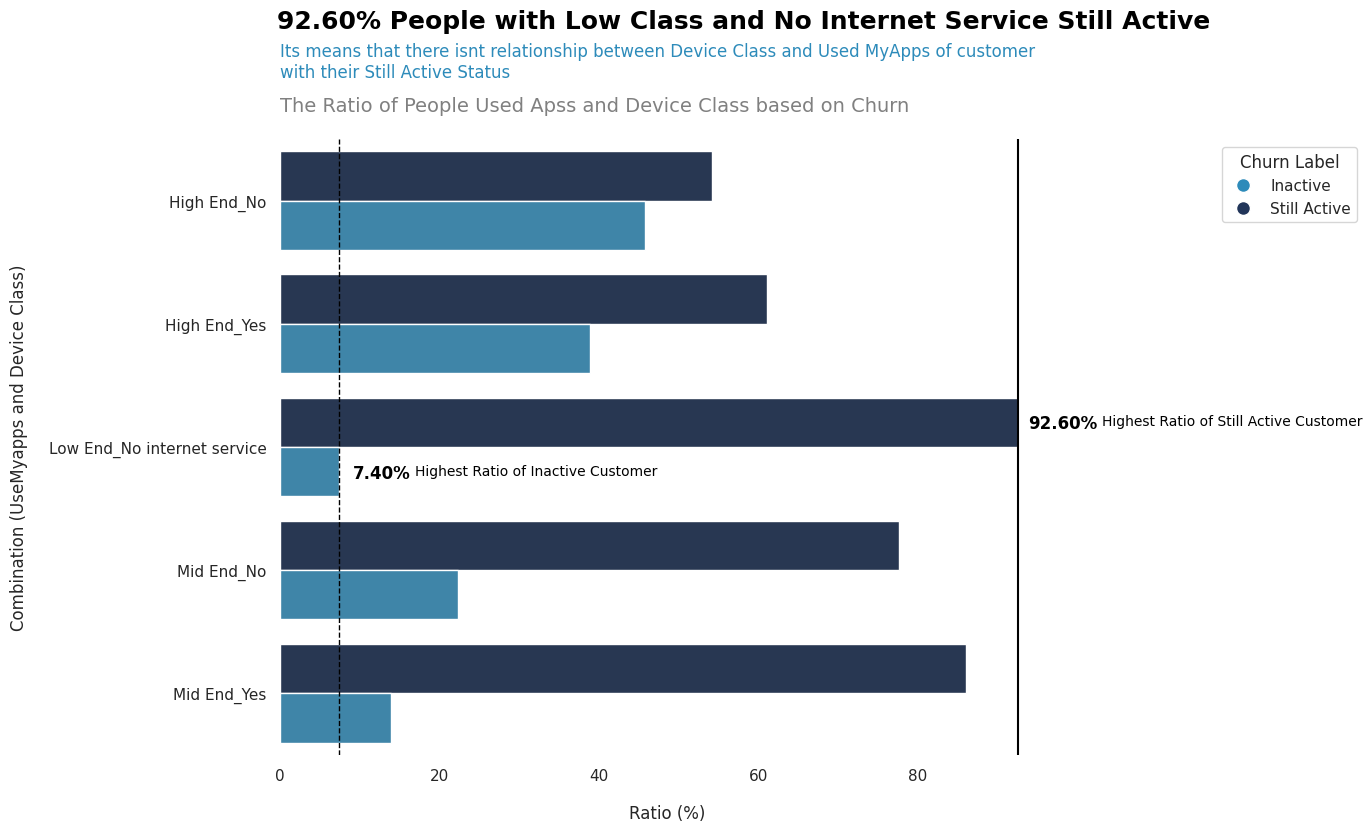

In [ ]:
# Setting Color Bar Plot
custom_color = {
     'Yes': '#2D8BBA' ,  # Color for  Churn = Yes
     'No': '#213559',  # Color for  Churn = No
     }

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Ratio',
                       y = 'Combination',
                       hue = 'Churn Label',
                       data = group_df,
                       palette = custom_color,
                       errorbar = None)

# Modifying Subtitle
sub_title = '92.60% People with Low Class and No Internet Service Still Active'
plt.annotate(sub_title,
             xy = (1.2, 1.18),
             xycoords = 'axes fraction',
             fontsize = 18,
             color = 'black',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'Its means that there isnt relationship between Device Class and Used MyApps of customer\nwith their Still Active Status  '
plt.annotate(sub_title1,
             xy = (0, 1.1),
             xycoords = 'axes fraction',
             fontsize = 12,
             color = '#2D8BBA',
             ha = 'left')

# Modifying Title
title = 'The Ratio of People Used Apss and Device Class based on Churn'
plt.title(title,
          fontsize = 14,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Including Label
# Including Highet Ratio
high_rat = group_df['Ratio'].max()
plt.axvline(x = [high_rat], color = 'black', ls = 'solid', lw = 1.5)
plt.text(high_rat + 10,
         1.85,
         f'{high_rat:.2f}%',
         ha = 'right',
         fontsize = 12,
         color = 'black',
         weight = 'bold')
plt.text(high_rat + 10.5,
         1.85,
        'Highest Ratio of Still Active Customer',
         ha = 'left',
         va = 'bottom',
         fontsize = 10,
         color = 'black')

# Including Lowest Ratio
low_rat = group_df['Ratio'].min()
plt.axvline(x = [low_rat], color = 'black', ls = '--', lw = 1)
plt.text(low_rat + 9,
         2.25,
         f'{low_rat:.2f}%',
         ha = 'right',
         fontsize = 12,
         color = 'black',
         weight = 'bold')
plt.text(low_rat + 9.5,
         2.25,
        'Highest Ratio of Inactive Customer',
         ha = 'left',
         va = 'bottom',
         fontsize = 10,
         color = 'black')

# Modifying Label
plt.xlabel('Ratio (%)', labelpad = 15)
plt.ylabel('Combination (UseMyapps and Device Class)', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
legend_labels = {'Yes' : 'Inactive', 'No': 'Still Active'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor = custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Churn Label', labels = legend_labels.values(), handles=legend_handles,loc='upper right', bbox_to_anchor=(1.4, 1))

plt.show()


# Apakah Payment Method mempengaruhi Churn?

### Grouped Dataframe By Senior Citizen and Phone Service

In [ ]:
# Group the DataFrame by 'SeniorCitizen' and 'PhoneService'
group1 = df.groupby(['Payment Method', 'Churn Label'])['Customer ID'].nunique().reset_index(name = 'UniqueCustomer')
group2 = df.groupby(['Payment Method'])['Customer ID'].nunique().reset_index(name = 'TotalUniqueCustomer')

# Merging Group
group_df = group1.merge(group2, how = 'inner', on = 'Payment Method')

# Calculate the percentage for each group
group_df['Ratio'] = round(group_df['UniqueCustomer'] / group_df['TotalUniqueCustomer'] * 100, 2)

group_df

,Payment Method,Churn Label,UniqueCustomer,TotalUniqueCustomer,Ratio
0,Credit,No,1290,1522,84.76
1,Credit,Yes,232,1522,15.24
2,Debit,No,1286,1544,83.29
3,Debit,Yes,258,1544,16.71
4,Digital Wallet,No,1304,1612,80.89
5,Digital Wallet,Yes,308,1612,19.11
6,Pulsa,No,1294,2365,54.71
7,Pulsa,Yes,1071,2365,45.29


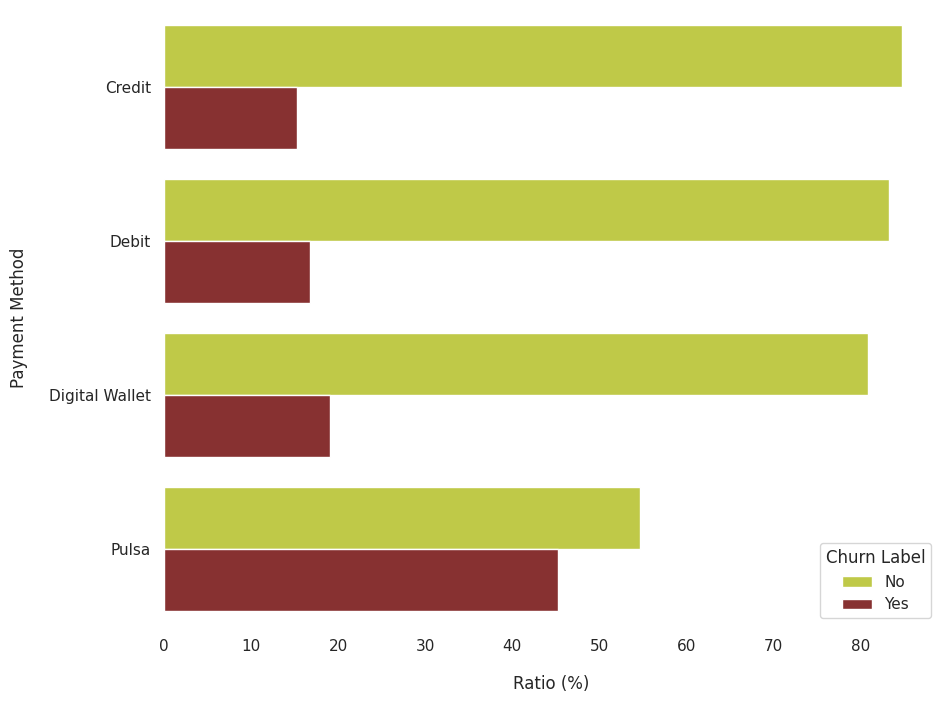

In [ ]:
# Setting Highest Ratio
# high_rat = group_df['Ratio'].max()
# low_rat = group_df['Ratio'].min()

# Setting Color Bar Plot
custom_color = {
    'No': '#D2DE32',  # Color for SeniorCitizen=0
    'Yes': '#952323',  # Color for SeniorCitizen=1
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Ratio', y='Payment Method', hue = 'Churn Label', data = group_df, palette = custom_color)

# # Modifying Subtitle
# sub_title = '90.89% Senior Citizen Used Phone Service'
# plt.annotate(sub_title,
#              xy = (0.688, 1.15),
#              xycoords = 'axes fraction',
#              fontsize = 16,
#              color = 'black',
#              ha = 'right',
#              weight = 'bold')

# # Modifying Subtitle
# sub_title1 = 'Higher then Senior Citizen who not used Phone Service'
# plt.annotate(sub_title1,
#              xy = (0.559, 1.1),
#              xycoords = 'axes fraction',
#              fontsize = 10,
#              color = '#D2DE32',
#              ha = 'right',
#              weight = 'bold')

# # Modifying Title
# title = 'The Ratio of Phone Service Based on Senior Citizen'
# plt.title(title,
#           fontsize = 12,
#           loc = 'left',
#           pad = 20,
#           color = 'grey')

# # Including Label
# # Including Label Highet Senior Citizen Used Phone Service
# plt.axhline(y = [high_rat], color = 'black', ls = 'solid', lw = 1.5)
# plt.text(1.3,
#          high_rat + 3,
#          f'{high_rat:.2f}%',
#          ha = 'right',
#          fontsize = 12,
#          color = 'black',
#          weight = 'bold')
# plt.text(1.2,
#          high_rat - 7,
#          'Used\nPhone Service',
#          ha = 'center',
#          va = 'bottom',
#          fontsize = 11,
#          color = 'white')

# # Including Label Senior Citizen Using Phone Service
# plt.axhline(y = [low_rat], color = 'black', ls = 'solid', lw = 1.5)
# plt.text(0.88,
#          low_rat + 3,
#          f'{low_rat:.2f}%',
#          ha = 'right',
#          fontsize = 12,
#          color = 'black',
#          weight = 'bold')
# plt.text(0.8,
#          low_rat - 7,
#          'Not Used\nPhone Service',
#          ha = 'center',
#          va = 'bottom',
#          fontsize = 11,
#          color = 'white')

# # Customize x-tick
# xtick_positions = [0, 1]  # Customize the positions as needed
# xtick_labels = ['Not Senior', 'Senior']  # Customize the tick labels

# plt.xticks(xtick_positions, xtick_labels)

# Modifying Label
plt.xlabel('Ratio (%)', labelpad = 15)
plt.ylabel('Payment Method', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


# Apakah Category Tenure mempengaruhi Churn?

### Grouped Dataframe By Senior Citizen and Phone Service

In [ ]:
df['Category Tenure'] = pd.cut(df['Tenure Months'],
                              bins=[0, 20, 40,
                              max(df['Tenure Months'])],
                              labels=['Low', 'Medium', 'High'],
                              include_lowest=True)
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Category Tenure
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,Low
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,Low
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,Low
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,Medium
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,High


In [ ]:
group_df = df.groupby('Category Tenure')['Customer ID'].nunique().reset_index(name = 'Total Customer')
group_df = group_df.sort_values(by='Category Tenure')

group_df

,Category Tenure,Total Customer
0,Low,2878
1,Medium,1408
2,High,2757


In [ ]:
# Group the DataFrame by 'SeniorCitizen' and 'PhoneService'
group1 = df.groupby(['Category Tenure', 'Churn Label'])['Customer ID'].nunique().reset_index(name = 'UniqueCustomer')
group2 = df.groupby(['Category Tenure'])['Customer ID'].nunique().reset_index(name = 'TotalUniqueCustomer')

# Merging Group
group_df = group1.merge(group2, how = 'inner', on = 'Category Tenure')

# Calculate the percentage for each group
group_df['Ratio'] = round(group_df['UniqueCustomer'] / group_df['TotalUniqueCustomer'] * 100, 2)

group_df

,Category Tenure,Churn Label,UniqueCustomer,TotalUniqueCustomer,Ratio
0,Low,No,1627,2878,56.53
1,Low,Yes,1251,2878,43.47
2,Medium,No,1093,1408,77.63
3,Medium,Yes,315,1408,22.37
4,High,No,2454,2757,89.01
5,High,Yes,303,2757,10.99


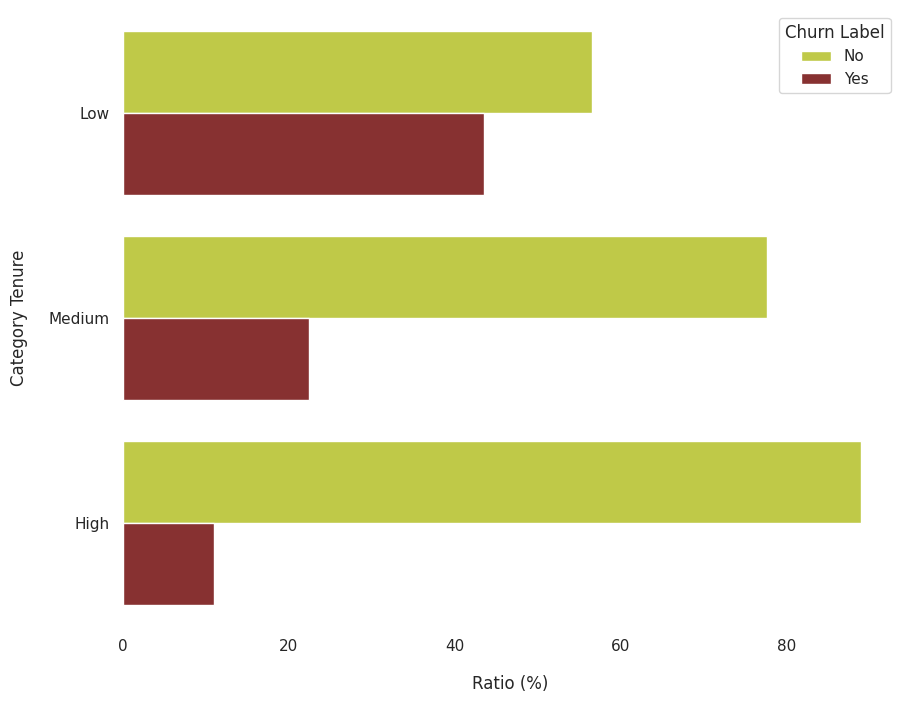

In [ ]:
# Setting Highest Ratio
# high_rat = group_df['Ratio'].max()
# low_rat = group_df['Ratio'].min()

# Setting Color Bar Plot
custom_color = {
    'No': '#D2DE32',  # Color for SeniorCitizen=0
    'Yes': '#952323',  # Color for SeniorCitizen=1
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.barplot(x = 'Ratio', y='Category Tenure', hue = 'Churn Label', data = group_df, palette = custom_color)

# # Modifying Subtitle
# sub_title = '90.89% Senior Citizen Used Phone Service'
# plt.annotate(sub_title,
#              xy = (0.688, 1.15),
#              xycoords = 'axes fraction',
#              fontsize = 16,
#              color = 'black',
#              ha = 'right',
#              weight = 'bold')

# # Modifying Subtitle
# sub_title1 = 'Higher then Senior Citizen who not used Phone Service'
# plt.annotate(sub_title1,
#              xy = (0.559, 1.1),
#              xycoords = 'axes fraction',
#              fontsize = 10,
#              color = '#D2DE32',
#              ha = 'right',
#              weight = 'bold')

# # Modifying Title
# title = 'The Ratio of Phone Service Based on Senior Citizen'
# plt.title(title,
#           fontsize = 12,
#           loc = 'left',
#           pad = 20,
#           color = 'grey')

# # Including Label
# # Including Label Highet Senior Citizen Used Phone Service
# plt.axhline(y = [high_rat], color = 'black', ls = 'solid', lw = 1.5)
# plt.text(1.3,
#          high_rat + 3,
#          f'{high_rat:.2f}%',
#          ha = 'right',
#          fontsize = 12,
#          color = 'black',
#          weight = 'bold')
# plt.text(1.2,
#          high_rat - 7,
#          'Used\nPhone Service',
#          ha = 'center',
#          va = 'bottom',
#          fontsize = 11,
#          color = 'white')

# # Including Label Senior Citizen Using Phone Service
# plt.axhline(y = [low_rat], color = 'black', ls = 'solid', lw = 1.5)
# plt.text(0.88,
#          low_rat + 3,
#          f'{low_rat:.2f}%',
#          ha = 'right',
#          fontsize = 12,
#          color = 'black',
#          weight = 'bold')
# plt.text(0.8,
#          low_rat - 7,
#          'Not Used\nPhone Service',
#          ha = 'center',
#          va = 'bottom',
#          fontsize = 11,
#          color = 'white')

# # Customize x-tick
# xtick_positions = [0, 1]  # Customize the positions as needed
# xtick_labels = ['Not Senior', 'Senior']  # Customize the tick labels

# plt.xticks(xtick_positions, xtick_labels)

# Modifying Label
plt.xlabel('Ratio (%)', labelpad = 15)
plt.ylabel('Category Tenure', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()
